MD. TANVIR JAWAD<br>ID: 21101221

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [5]:
from pandas import read_html


filename = 'https://en.wikipedia.org/wiki/Demographics_of_the_United_States#:~:text=The%20United%20States%20had%20an,to%20the%20U.S.%20Census%20Bureau.'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

85

In [9]:
table1 = tables[4]
table1.head()

,total (in thousands),% of US pop.,males (in thousands),females (in thousands),% male,% female,sex ratio: male/female
age (years),,,,,,,
0,3564,1.1%,1822,1743,51.1%,48.9%,1.05
< 5,18827,5.7%,9624,9203,51.1%,48.9%,1.05
< 15,60467,18.2%,30989,29578,51.2%,48.8%,1.05
15-24,43089,13.0%,21996,21092,51.0%,49.0%,1.04
25-34,45495,13.7%,23053,22442,50.7%,49.3%,1.03


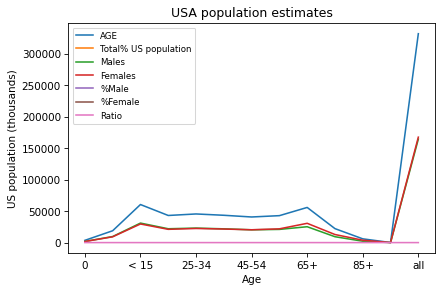

In [13]:
table1.columns = ['AGE', 'Total' '% US population', 'Males', 'Females', '%Male', '%Female', 'Ratio']
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')
table1.plot()
decorate(xlabel='Age', ylabel='US population (thousands)', title='USA population estimates')
plt.legend(fontsize='small');

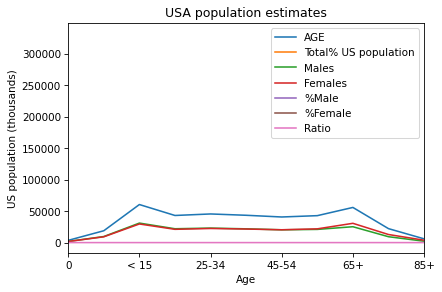

In [18]:
table1.plot()
decorate(xlim=[0, 10], xlabel='Age', ylabel='US population (thousands)', title='USA population estimates')

In [20]:
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[6]
table2.head()

,Male LEB in 2021,Female LEB in 2021,Total LEB in 2021*,Total LEB in 2020,Total LEB in 2019,2019 - 2021
Race,,,,,,
NH White,73.7,79.2,76.4,77.4,78.8,2.4
NH Black,66.7,74.8,70.8,71.5,74.8,4.0
NH Asian,81.2,85.6,83.5,83.6,85.6,2.1
NH American Indian or Alaska Native,61.5,69.2,65.2,67.1,71.8,6.6
Hispanic,74.4,81.0,77.7,77.9,81.9,4.2


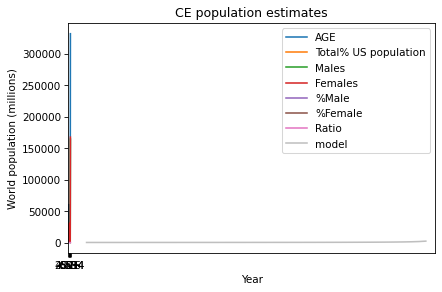

In [21]:
from numpy import linspace
from matplotlib.pyplot import plot

xs = linspace(100, 1950)
ys = 110 + 200000 / (2040 - xs)
table1.plot()
plot(xs, ys, color='gray', alpha=0.5, label='model')

decorate(xlim=[0, 2000], xlabel='Year', ylabel='World population (millions)', title='CE population estimates')

EXAMPLE: See if you can find a model that fits these estimates. How well does your best model predict actual US population from 15 years old to 65?

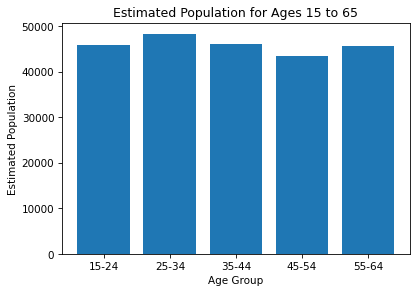

In [23]:
age_data = {
    '15-24': 43089,
    '25-34': 45495,
    '35-44': 43404,
    '45-54': 40688,
    '55-64': 42803,
}

total_population_age_lt_15 = 60467
total_population_all = 331894
total_population_change_15_to_65 = total_population_all - total_population_age_lt_15
years_15_to_65 = 50
annual_growth_rate = total_population_change_15_to_65 / years_15_to_65
age_groups = list(age_data.keys())
population_ages_15_to_65 = [age_data[age] + (annual_growth_rate / 2) for age in age_groups]

plt.bar(age_groups, population_ages_15_to_65)
plt.xlabel('Age Group')
plt.ylabel('Estimated Population')
plt.title('Estimated Population for Ages 15 to 65')
plt.show()